In [1]:
# ======================================================
# CLASIFICACIÓN CON K-MEANS
# Autor: Carlos Iván Sainz Torres
# Materia: Clasificación Inteligente de Datos
# ======================================================

# ======================================================
# 1. FUNDAMENTOS DE LA TÉCNICA
# ======================================================
# K-Means es un algoritmo de agrupamiento no supervisado.
# Su objetivo es dividir un conjunto de datos en k grupos (clusters)
# de manera que los puntos dentro de un mismo grupo sean lo más parecidos posible
# y los puntos de diferentes grupos sean lo más distintos posible.
#
# Aunque se usa principalmente para agrupamiento, también puede
# utilizarse como técnica de clasificación no supervisada
# cuando se conoce el número de clases esperado.

In [2]:
# ======================================================
# 2. MODELO MATEMÁTICO
# ======================================================
# El algoritmo busca minimizar la distancia entre los puntos
# y el centroide del cluster al que pertenecen.
#
# El valor que se minimiza es la suma de los cuadrados de las distancias:
#
# J = Σ Σ || x_i - μ_j ||²
#
# donde:
# - x_i es un punto de datos
# - μ_j es el centroide del cluster j
# - || · || es la distancia euclidiana
#
# El algoritmo repite dos pasos principales:
# 1. Asignar cada punto al centroide más cercano
# 2. Recalcular los centroides como la media de los puntos asignados

In [3]:
# ======================================================
# 3. LIBRERÍAS Y CLASES USADAS
# ======================================================
# Usaremos scikit-learn y pandas para manejar datos y graficar resultados.
# - sklearn.datasets: para cargar datasets de ejemplo
# - sklearn.cluster.KMeans: implementación principal del algoritmo K-Means
# - sklearn.metrics: para evaluar el rendimiento mediante matriz de confusión y accuracy
# - matplotlib y seaborn: para graficar resultados

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%    

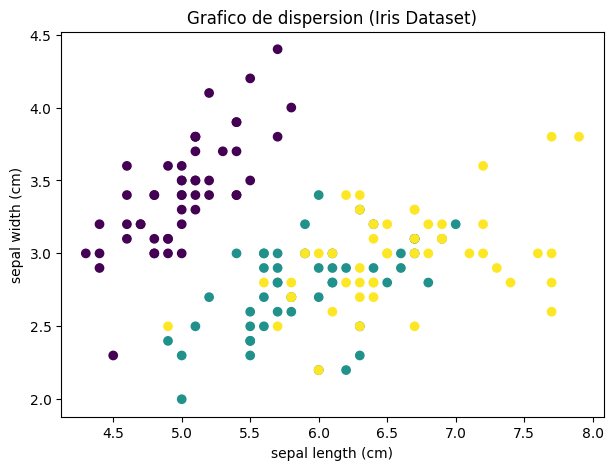

In [4]:
# ======================================================
# 4. PREPROCESAMIENTO
# ======================================================
# Cargamos el dataset Iris

data = load_iris()
X = data.data
y = data.target
columnas = data.feature_names

df = pd.DataFrame(X, columns=columnas)
df["target"] = y

print("Primeras filas del dataset:")
print(df.head())

print("\nEstadísticas descriptivas:")
print(df.describe())

#Grafico de dispersion
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["target"], cmap="viridis")
plt.xlabel(columnas[0])
plt.ylabel(columnas[1])
plt.title("Grafico de dispersion (Iris Dataset)")
plt.show()

In [5]:
# ======================================================
# 5. MODEL TRAINING
# ======================================================
# Entrenamos el modelo K-Means con 3 clusters

modelo_kmeans = KMeans(n_clusters=3, random_state=42)
modelo_kmeans.fit(X)

print("\nModelo K-Means entrenado correctamente")


Modelo K-Means entrenado correctamente


In [6]:
# ======================================================
# 6. PREDICTION
# ======================================================
# Creamos una función que recibe un patrón y devuelve el cluster asignado

def predecir_cluster(modelo, patron):
    """
    Función para predecir el cluster de un nuevo patrón.
    """
    pred = modelo.predict([patron])
    print(f"Patrón {patron} → Cluster asignado: {pred[0]}")

#Ejemplos
print("\nPredicciones de ejemplo:")
predecir_cluster(modelo_kmeans, [5.1, 3.5, 1.4, 0.2])
predecir_cluster(modelo_kmeans, [6.7, 3.1, 4.7, 1.5])
predecir_cluster(modelo_kmeans, [7.2, 3.0, 5.8, 1.6])


Predicciones de ejemplo:
Patrón [5.1, 3.5, 1.4, 0.2] → Cluster asignado: 1
Patrón [6.7, 3.1, 4.7, 1.5] → Cluster asignado: 2
Patrón [7.2, 3.0, 5.8, 1.6] → Cluster asignado: 0



Matriz de Confusion:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


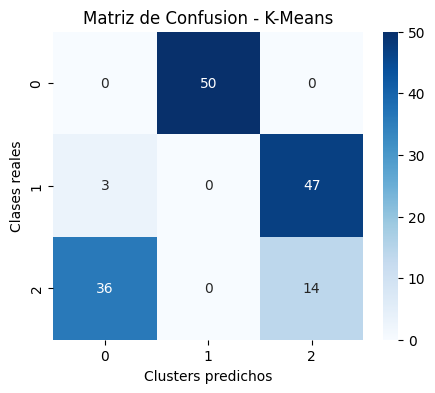


Precision (Accuracy): 0.09

Interpretacion:
- La matriz de confusión muestra cómo los clusters se relacionan con las clases reales.
- El accuracy se usa aquí solo como referencia, no como medida exacta de rendimiento.
- En K-Means, las etiquetas pueden variar porque el algoritmo no conoce las clases reales.


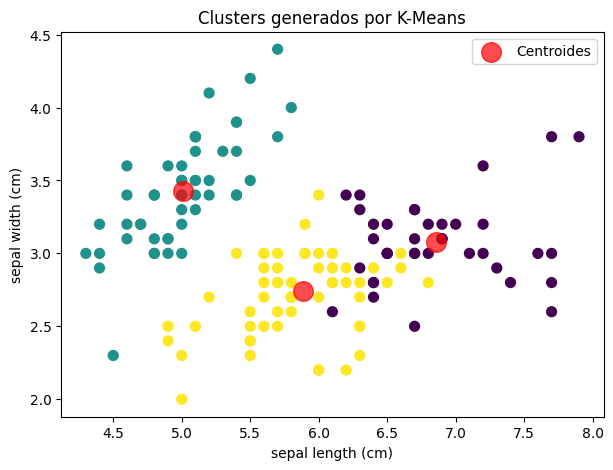

In [7]:
# ======================================================
# 7. MODEL EVALUATION
# ======================================================
# Comparamos las etiquetas del modelo con las clases reales

y_pred = modelo_kmeans.labels_

#Matriz de confusion
matriz = confusion_matrix(y, y_pred)
print("\nMatriz de Confusion:")
print(matriz)

plt.figure(figsize=(5,4))
sns.heatmap(matriz, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusion - K-Means")
plt.xlabel("Clusters predichos")
plt.ylabel("Clases reales")
plt.show()

#Calcular Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nPrecision (Accuracy): {accuracy:.2f}")


print("\nInterpretacion:")
print("- La matriz de confusión muestra cómo los clusters se relacionan con las clases reales.")
print("- El accuracy se usa aquí solo como referencia, no como medida exacta de rendimiento.")
print("- En K-Means, las etiquetas pueden variar porque el algoritmo no conoce las clases reales.")

#Visualizacion de los clusters obtenidos
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=50)
centros = modelo_kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='red', s=200, alpha=0.7, label='Centroides')
plt.xlabel(columnas[0])
plt.ylabel(columnas[1])
plt.title("Clusters generados por K-Means")
plt.legend()
plt.show()